In [67]:
# Setup and Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

# Pull in and Read CSV
zip_code_type = {'Zipcode': str}
complete_df = Path("Resources\combined_df.csv")
complete_df = pd.read_csv(complete_df, dtype=zip_code_type)

# Check to confirm DF pulled in correctly
complete_df.head()

,Name,Household Income,Population,Median Age,Per Capita Income,Poverty,No Education,High School Education,GED,Associates,...,poverty_family_married,Single Male,Single Female,poverty_female,poverty_male,poverty_family,state,Zipcode,Year,Poverty Rate
0,ZCTA5 00601,13092.0,17242.0,40.5,6999.0,10772.0,492.0,2868.0,160.0,888.0,...,1223.0,215.0,988.0,5905.0,4867.0,2426.0,72.0,00601,2018,62.475351
1,ZCTA5 00602,16358.0,38442.0,42.3,9277.0,19611.0,901.0,5751.0,947.0,3387.0,...,2360.0,502.0,1665.0,10077.0,9534.0,4527.0,72.0,00602,2018,51.014515
2,ZCTA5 00603,16603.0,48814.0,41.1,11307.0,24337.0,924.0,8745.0,996.0,2370.0,...,2393.0,697.0,3349.0,13467.0,10870.0,6439.0,72.0,00603,2018,49.856599
3,ZCTA5 00606,12832.0,6437.0,43.3,5943.0,4163.0,185.0,1284.0,138.0,241.0,...,421.0,109.0,251.0,2110.0,2053.0,781.0,72.0,00606,2018,64.672984
4,ZCTA5 00610,19309.0,27073.0,42.1,10220.0,11724.0,643.0,4945.0,624.0,2241.0,...,1307.0,278.0,1029.0,6074.0,5650.0,2614.0,72.0,00610,2018,43.305138


In [2]:
# How many total lines of data
complete_df.value_counts()


Name         Household Income  Population  Median Age  Per Capita Income  Poverty  No Education  High School Education  GED    Associates  Bachelors  Masters  Professional  Doctorate  poverty_family_married  Single Male  Single Female  poverty_female  poverty_male  poverty_family  state  Zipcode  Year  Poverty Rate
ZCTA5 00601  13092.0           17242.0     40.5        6999.0             10772.0  492.0         2868.0                 160.0  888.0       1781.0     216.0    15.0          79.0       1223.0                  215.0        988.0          5905.0          4867.0        2426.0          72.0   00601    2018  62.475351       1
ZCTA5 63563  43611.0           724.0       29.8        33608.0            98.0     33.0          130.0                  22.0   26.0        31.0       10.0     5.0           8.0        13.0                    0.0          8.0            74.0            24.0          21.0            29.0   63563    2019  13.535912       1
ZCTA5 63555  49125.0           3344.0  

In [3]:
# New DF with only pertinent info
per_capita_df = complete_df[['Zipcode',
    'Year',
    'Population',
    'Per Capita Income']]

per_capita_df.head()

,Zipcode,Year,Population,Per Capita Income
0,00601,2018,17242.0,6999.0
1,00602,2018,38442.0,9277.0
2,00603,2018,48814.0,11307.0
3,00606,2018,6437.0,5943.0
4,00610,2018,27073.0,10220.0


In [4]:
# Drop null values
per_capita_df_clean = per_capita_df.dropna()
per_capita_df_clean.head()


,Zipcode,Year,Population,Per Capita Income
0,00601,2018,17242.0,6999.0
1,00602,2018,38442.0,9277.0
2,00603,2018,48814.0,11307.0
3,00606,2018,6437.0,5943.0
4,00610,2018,27073.0,10220.0


In [5]:
# Drop substitute null values
per_capita_df_clean = per_capita_df_clean[per_capita_df_clean['Per Capita Income'] != -666666666]

In [6]:
# Number of people living in rural areas by year
rural_pops = per_capita_df_clean[per_capita_df_clean['Population'] < 50000]
years = range(2018, 2023)

# Using list comprehension to generate the list of sums
rural_pops_by_year = [f"{year}: {(rural_pops[rural_pops['Year'] == year]['Population'].sum())}"
              for year in years]

print("Total Number of People living in Rural Areas by Year:")
for item in rural_pops_by_year:
    print(item)


Total Number of People living in Rural Areas by Year:
2018: 268661077.0
2019: 268601840.0
2020: 268512145.0
2021: 270716329.0
2022: 271011282.0


In [7]:
rural_pops_float = []
for pop in rural_pops_by_year:
    rural_pops_float.append(float(pop.split(': ')[1]))
rural_pops_float

[268661077.0, 268601840.0, 268512145.0, 270716329.0, 271011282.0]

In [8]:
# Number of people living in urban areas by year
urban_pops = per_capita_df_clean[per_capita_df_clean['Population'] >= 50000]
years = range(2018, 2023)

# Using list comprehension to generate the list of sums
urban_pops_by_year = [f"{year}: {(urban_pops[urban_pops['Year'] == year]['Population'].sum())}"
              for year in years]

print("Total Number of US Population living in Urban Areas by Year:")
for item in urban_pops_by_year:
    print(item)

Total Number of US Population living in Urban Areas by Year:
2018: 57549030.0
2019: 59383501.0
2020: 61276360.0
2021: 62296744.0
2022: 63333982.0


In [72]:
urban_rural = {"Total Rural Population": rural_pops_float, "Total Urban Population": urban_pops_float}
years = [2018, 2019, 2020, 2021, 2022]
combined_urban_rural = pd.DataFrame(urban_rural, index=years)
combined_urban_rural = combined_urban_rural.reset_index()
combined_urban_rural = combined_urban_rural.rename(columns={'index': 'Year'})
combined_urban_rural

,Year,Total Rural Population,Total Urban Population
0,2018,268661077.0,57549030.0
1,2019,268601840.0,59383501.0
2,2020,268512145.0,61276360.0
3,2021,270716329.0,62296744.0
4,2022,271011282.0,63333982.0


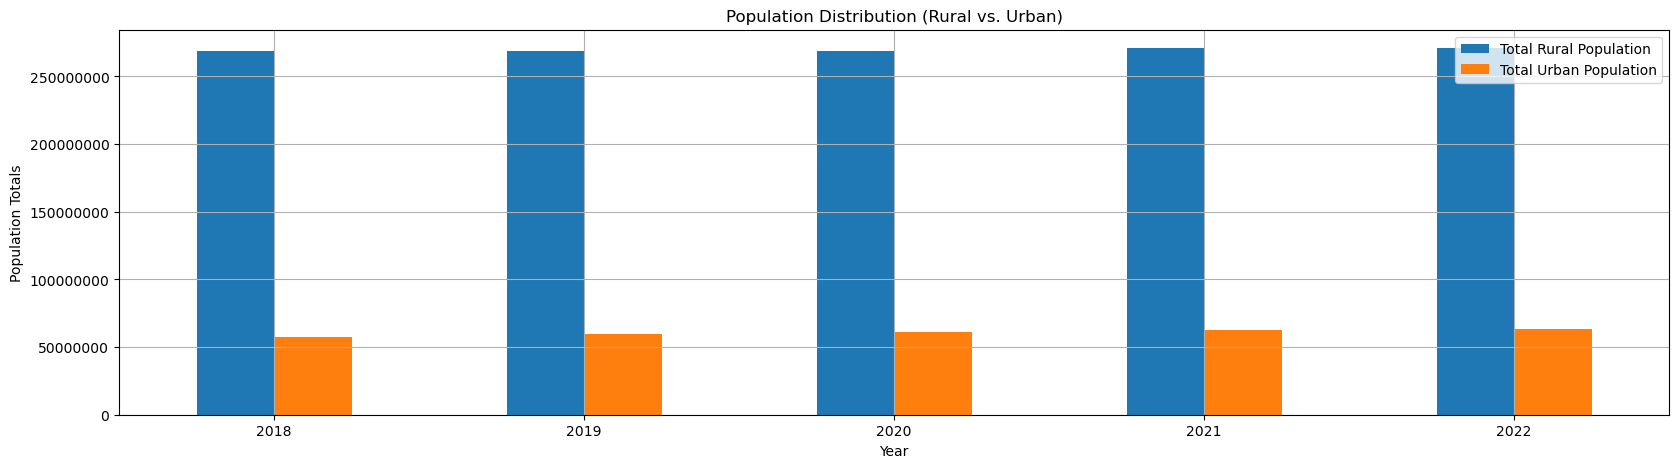

In [56]:
columns_to_plot = ['Total Rural Population', 'Total Urban Population']
subset_data = combined_urban_rural[columns_to_plot]

populations = subset_data.plot(kind='bar', figsize=(20, 5), rot=360)
populations.set_xticklabels(years)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Population Distribution (Rural vs. Urban)')
plt.xlabel('Year')
plt.ylabel('Population Totals')
plt.grid(True)
plt.savefig("Resources/PopulationDistribution.png")

In [14]:
urban_pops_float = []
for pop in urban_pops_by_year:
    urban_pops_float.append(float(pop.split(': ')[1]))
urban_pops_float


[57549030.0, 59383501.0, 61276360.0, 62296744.0, 63333982.0]

In [10]:
print(urban_pops_by_year)


['2018: 57549030.0', '2019: 59383501.0', '2020: 61276360.0', '2021: 62296744.0', '2022: 63333982.0']


In [92]:
rural_pops[rural_pops['Year'] == 2018].describe()

,Year,Population,Per Capita Income
count,31545.0,31545.000000,31545.000000
mean,2018.0,8516.756285,29892.470471
std,0.0,11570.020910,13886.648265
min,2018.0,5.000000,42.000000
25%,2018.0,742.000000,22193.000000
50%,2018.0,2738.000000,27224.000000
75%,2018.0,12066.000000,33934.000000
max,2018.0,49976.000000,461279.000000


In [85]:
rural_pops.describe()

,Year,Population,Per Capita Income
count,160287.000000,160287.000000,1.602870e+05
mean,2020.009127,8406.833137,-9.250919e+06
std,1.415320,11577.633802,7.812399e+07
min,2018.000000,0.000000,-6.666667e+08
25%,2019.000000,686.000000,2.365100e+04
50%,2020.000000,2610.000000,2.952800e+04
75%,2021.000000,11777.000000,3.744850e+04
max,2022.000000,49999.000000,7.573530e+05


In [38]:
# Rural Income Averages
years = range(2018, 2023)

# Using list comprehension to generate the list of rounded means
rural_means_list = [f"{year}: {round(rural_pops[rural_pops['Year'] == year]['Per Capita Income'].mean(), 2)}"
              for year in years]

print("Average Per Capita Income (Rural Populations) by Year:")
for item in rural_means_list:
    print(item)


Average Per Capita Income (Rural Populations) by Year:
2018: 29892.47
2019: 31113.63
2020: 32205.43
2021: 33964.39
2022: 37221.51


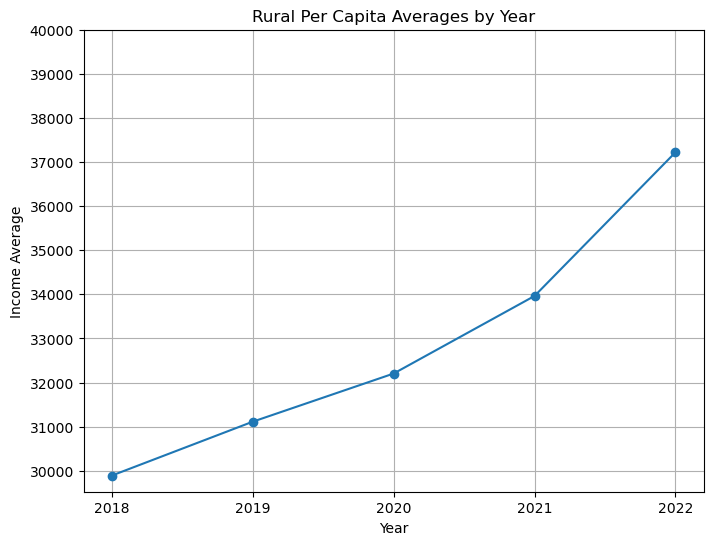

In [39]:
# Rural SCATTER
rural_years = []
rural_means = []
for item in rural_means_list:
    year, mean = item.split(':')
    rural_years.append(int(year))
    rural_means.append(float(mean))

plt.figure(figsize=(8,6))
plt.plot(rural_years, rural_means, marker='o', linestyle='-')
plt.title('Rural Per Capita Averages by Year')
plt.xlabel('Year')
plt.xticks(rural_years)
plt.ylabel('Income Average')
custom_yticks = range(30000, 41000, 1000)
plt.yticks(custom_yticks)
plt.grid(True)
plt.show()

In [40]:
# Urban Income Averages
years = range(2018, 2023)

# Using list comprehension to generate the list of rounded means
urban_means_list = [f"{year}: {round(urban_pops[urban_pops['Year'] == year]['Per Capita Income'].mean(), 2)}"
              for year in years]

print("Average Per Capita Income (Urban Populations) by Year:")
for item in urban_means_list:
    print(item)


Average Per Capita Income (Urban Populations) by Year:
2018: 30621.15
2019: 32168.02
2020: 33502.69
2021: 35774.08
2022: 39326.45


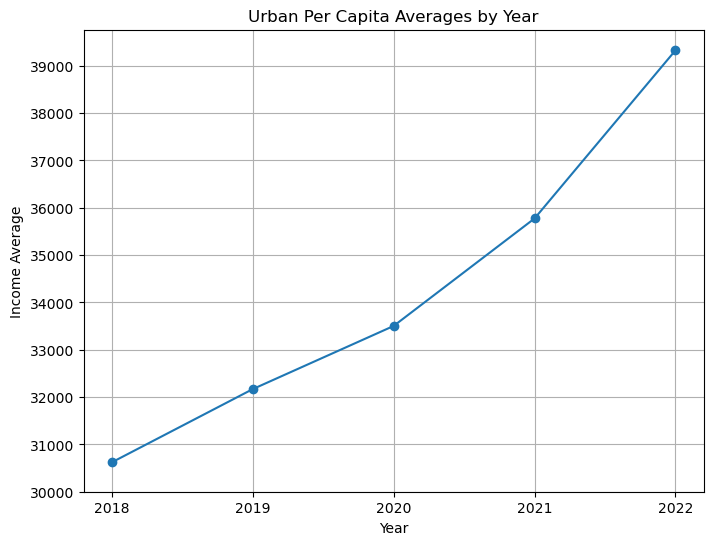

In [41]:
# Urban SCATTER
urban_years = []
urban_means = []
for item in urban_means_list:
    year, mean = item.split(':')
    urban_years.append(int(year))
    urban_means.append(float(mean))

plt.figure(figsize=(8,6))
plt.plot(urban_years, urban_means, marker='o', linestyle='-')
plt.title('Urban Per Capita Averages by Year')
plt.xlabel('Year')
plt.xticks(urban_years)
plt.ylabel('Income Average')
custom_yticks = range(30000, 40000, 1000)
plt.yticks(custom_yticks)
plt.grid(True)
plt.show()

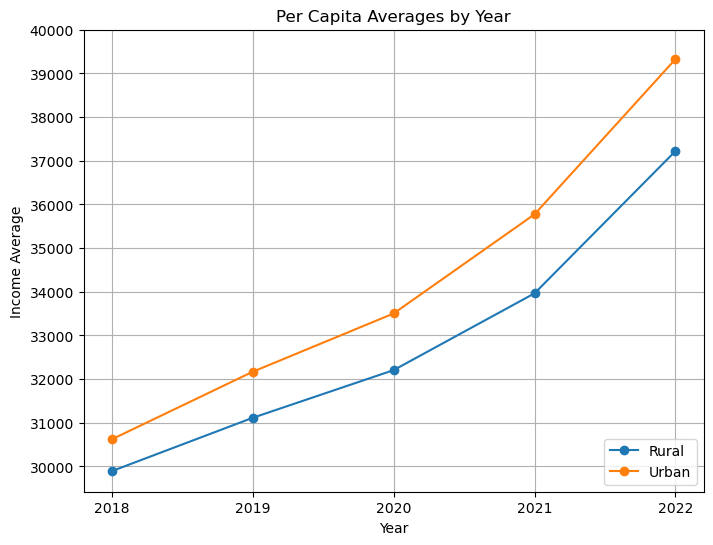

In [57]:
# Rural/Urban SCATTER
rural_years = []
rural_means = []
for item in rural_means_list:
    year, mean = item.split(':')
    rural_years.append(int(year))
    rural_means.append(float(mean))

urban_years = []
urban_means = []
for item in urban_means_list:
    year, mean = item.split(':')
    urban_years.append(int(year))
    urban_means.append(float(mean))
    
plt.figure(figsize=(8,6))
plt.plot(rural_years, rural_means, marker='o', linestyle='-', label="Rural")
plt.plot(urban_years, urban_means, marker='o', linestyle='-', label="Urban")
plt.title('Per Capita Averages by Year')
plt.xlabel('Year')
plt.xticks(rural_years)
plt.ylabel('Income Average')
custom_yticks = range(30000, 41000, 1000)
plt.yticks(custom_yticks)
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig("Resources/PerCapitaAveragesByYear")

In [75]:
combined_urban_rural['Urban Per Capita Average']=urban_means
combined_urban_rural['Rural Per Capita Average']=rural_means
combined_urban_rural

,Year,Total Rural Population,Total Urban Population,Urban Per Capita Average,Rural Per Capita Average
0,2018,268661077.0,57549030.0,30621.15,29892.47
1,2019,268601840.0,59383501.0,32168.02,31113.63
2,2020,268512145.0,61276360.0,33502.69,32205.43
3,2021,270716329.0,62296744.0,35774.08,33964.39
4,2022,271011282.0,63333982.0,39326.45,37221.51


In [74]:
combined_urban_rural.corr()

,Year,Total Rural Population,Total Urban Population
Year,1.00000,0.862040,0.988700
Total Rural Population,0.86204,1.000000,0.792634
Total Urban Population,0.98870,0.792634,1.000000


The r-value is: 0.97
Reression: y = 1750.88x + -3503906.19
The r-value is: 0.98
Reression: y = 2101.67x + -4211086.84


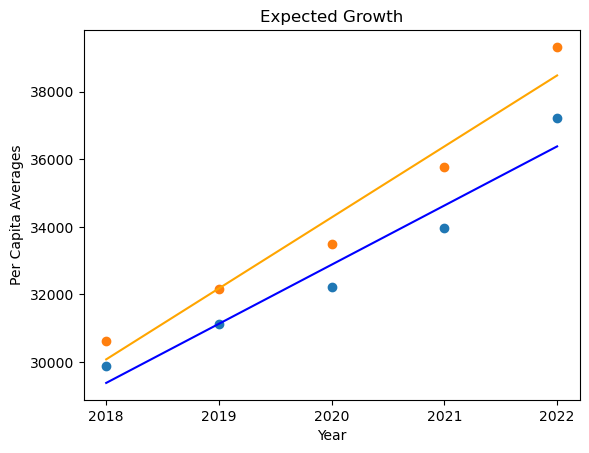

In [101]:
def plot_linear_regression1(x_values, y_values, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))
    slope, intercept = np.polyfit(x_values, y_values, 1)
    correlation = st.pearsonr(x_values, y_values)

    print(f'The r-value is: {round(correlation[0],2)}')
    print(f'Reression: {line_eq}')
    #plt.annotate(line_eq, text_coordinates, color='red', fontsize=10)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,color='blue')
    plt.xticks(rural_years)
    plt.xlabel('Year')
    plt.ylabel(title)
    plt.title('Expected Growth')

def plot_linear_regression2(x_values, y_values, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))
    slope, intercept = np.polyfit(x_values, y_values, 1)
    correlation = st.pearsonr(x_values, y_values)

    print(f'The r-value is: {round(correlation[0],2)}')
    print(f'Reression: {line_eq}')
    #plt.annotate(line_eq, text_coordinates, color='red', fontsize=10)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, color='orange')
    plt.xticks(rural_years)
    plt.xlabel('Year')
    plt.ylabel(title)
    

plot_linear_regression1(combined_urban_rural['Year'], combined_urban_rural['Rural Per Capita Average'], 'Per Capita Averages')
plot_linear_regression2(combined_urban_rural['Year'], combined_urban_rural['Urban Per Capita Average'], 'Per Capita Averages')

plt.savefig("Resources/ExpectedGrowth")
